# Домашняя работа №7 (Курс "Advanced Python")
## ФИО:

**Тема:** Итераторы и генераторы  
**Выдана:** 22 октября  
**Мягкий дедлайн:** 29 октября  
**Жесткий дедлайн:** 5 ноября  

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

### Задача 1: генератор степеней числа по модулю n (1 балл)
Напишите генератор powers_mod(x, n), который будет генерировать последовательность чисел $x^0 (\!\!\!\!\mod n), x^1 (\!\!\!\!\mod n), x^2 (\!\!\!\!\mod n), \ldots$, пока очередная степень не будет равна 1. 

In [39]:
def  powers_mod(x, n):
    _current = 1
    while True:
        yield (_current % n)
        _next = _current*x
        if _next == 1:
            break
        _current = _next
                
a = powers_mod(3,4)
print(next(a))
print(next(a))
print(next(a))
print(next(a))

1
3
1
3


### Задача 2: биномиальные коэффициенты (2 балла)
Напишите генератор binom_coeffs(n), генерирующий последовательность биномиальных коэффициентов $C_n^0, C_n^1, \ldots, C_n^n$, **без использования факторалов** (т.е вычислять текущее значение на основе предыдущего). Если никак не удается придумать формулу, то погуглите ее. Она есть даже на Википедии ;)

In [25]:
#C из n по к - это С из п по к-1 * (п - к + 1)\к 

def binom_coeffs(n):
    _current = 1
    for k in range(1, n + 2):
        yield _current 
        _current = _current*(n-k+1)/k
    
        
for i in binom_coeffs(4):
    print(i)        

1
4.0
6.0
4.0
1.0


### Задача 3: денежные потоки (1 балл)
Пользуясь библиотекой itertools, напишите генератор calc_budget(iterable), который по входящей последовательности ежедневных доходов (положительные значения) или расходов (отрицательные) возвращает поседовательность доступных средств (отрицательные значения, если расходов больше доходов на данный день) на каждый из дней. Например: calc_budget([20, -5, -5, 10, -40, 10, 10, 100, -30]) $\to$ 20, 15, 10, 20, -20, -10, 0, 100, 70

In [34]:
#ну тут значит суммы считаем, пользуемся accumulate 
from itertools import accumulate
def calc_budget(iterable):
    for i in accumulate(iterable):
        yield(i)
        
a = calc_budget([20, -5, -5, 10, -40, 10, 10, 100, -30])
print(next(a))
print(next(a))
print(next(a))
print(next(a))
print(next(a))
for i in calc_budget([20, -5, -5, 10, -40, 10, 10, 100, -30]):
    print(i, end = ",")        

20
15
10
20
-20
20,15,10,20,-20,-10,0,100,70,

### Задача 4: закупки зоопарка (2 балла)
Пользуясь библиотекой itertools (при помощи groupby), напишите функцию, которая по входящему списку кортежей вида (животное, вид еды, потребеление еды в кг за месяц) будет вычислять, сколько различной еды необходимо закупить зоопарку на месяц. Например:
```python3
        costs = [("Тигр", "мясо", 30),
                 ("Тигр", "вода", 120),
                 ("Тигр", "яйца", 5),
                 ("Змея", "яйца", 3),
                 ("Змея", "вода", 10),
                 ("Антилопа", "трава", 100),
                 ("Антилопа", "вода", 100)
                ]
        #calc_food(costs) вернет {"мясо":30, "вода":230, "яйца":8, "трава": 100}
```

In [37]:
from itertools import groupby
def calc_food(costs):
    spisok = {}
    for key, group in groupby(costs, lambda x: x[1]):#группируем по значению - по типу продукта с помощью лямбда функции
        for i in group:
            if key not in spisok: #
                spisok[key] = i[2]
            else:
                spisok[key] += i[2]
            
    return spisok

costs = [("Тигр", "мясо", 30),
                 ("Тигр", "вода", 120),
                 ("Тигр", "яйца", 5),
                 ("Змея", "яйца", 3),
                 ("Змея", "вода", 10),
                 ("Антилопа", "трава", 100),
                 ("Антилопа", "вода", 100)
                ]
calc_food(costs)

{'мясо': 30, 'вода': 230, 'яйца': 8, 'трава': 100}

### Задача 5: датасет изображений (3 балла)
Напишите генератор urlImgs(links), который будет генерировать последовательность изображений, скачанных по ссылкам из переданного списка links. Возможно, вам понадобятся модули requests, PIL и io

In [40]:
#код Золкина-Хрипливого
import requests
import PIL
import io
def urlImgs(links):
    for i in links:
        pic = requests.get(i, stream = True)
        yield PIL.Image.open(io.BytesIO(pic.content))

Проиллюстрируйте работу вашего генератора выполнением ячеек ниже

In [41]:
%pylab inline
def return_size(total):
    """Возвращает размеры X и Y - сколько изображений будет на итоговой картинке вывода"""
    pos_sizes = [2,3]
    size_x = max(pos_sizes)
    for size in reversed(pos_sizes):
        if total % size == 0:
            size_x = size
            break
    
    size_y = math.ceil(total / size_x)
    return size_x, size_y

def plot_all_images(images):
    if not images:
        return
    
    n_images = len(images)
    fig = plt.figure(figsize=(22,10))
    size_y, size_x = return_size(n_images)
    
    for i, image in enumerate(images):
        plt.subplot(size_x, size_y, i+1)
        plt.imshow(image)

Populating the interactive namespace from numpy and matplotlib


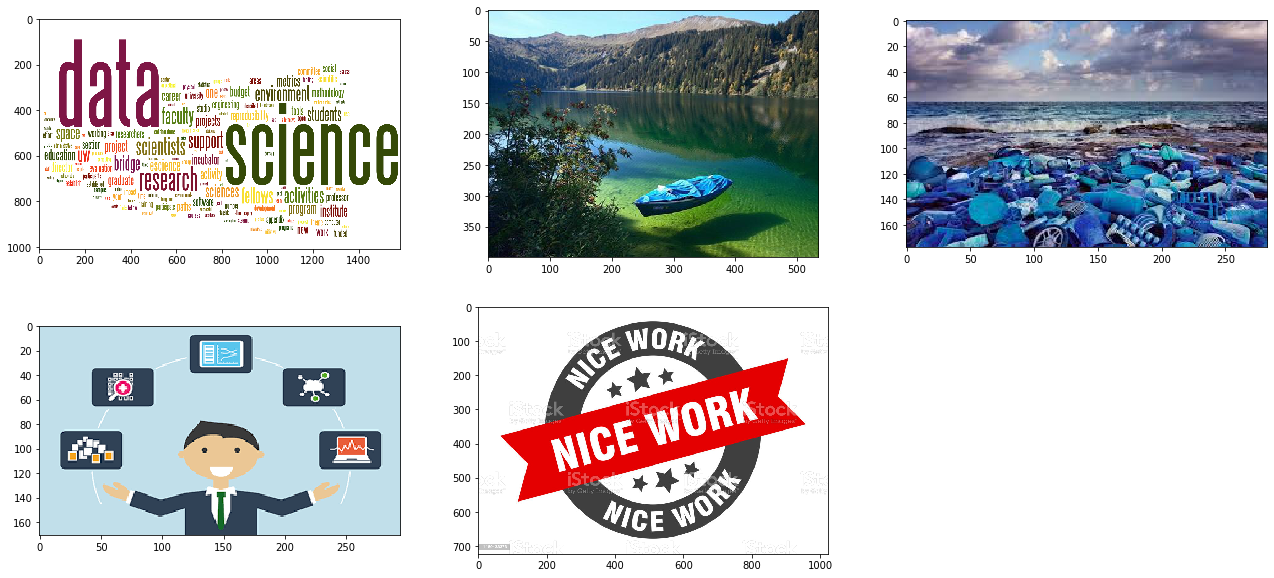

In [43]:
links = ["https://plyus.pw/wp-content/uploads/2020/10/gen1.png",
      "https://plyus.pw/wp-content/uploads/2020/10/gen2.jpg",
      "https://plyus.pw/wp-content/uploads/2020/10/gen3.jpg",
      "https://plyus.pw/wp-content/uploads/2020/10/gen4.png",
      "https://plyus.pw/wp-content/uploads/2020/10/gen5.jpg"]
plot_all_images(list(urlImgs(links)))

### Задача 6: остановка генератора (1 балл)
Создайте генератор, который генерирует числа Фибоначчи, пока в него не отправить сигнал StopIteration

In [35]:
def fibonachi():
    a = ''
    f1, f2 = 1, 1
    while a != "Stoplteration":
        yield f1
        f1, f2 = f2, f1 + f2
        a = input()
        
for i in fibonachi():
    print(i)

1

1

2

3

5

8

13

21
Stoplteration
